# **Sale price prediction**

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.



Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python

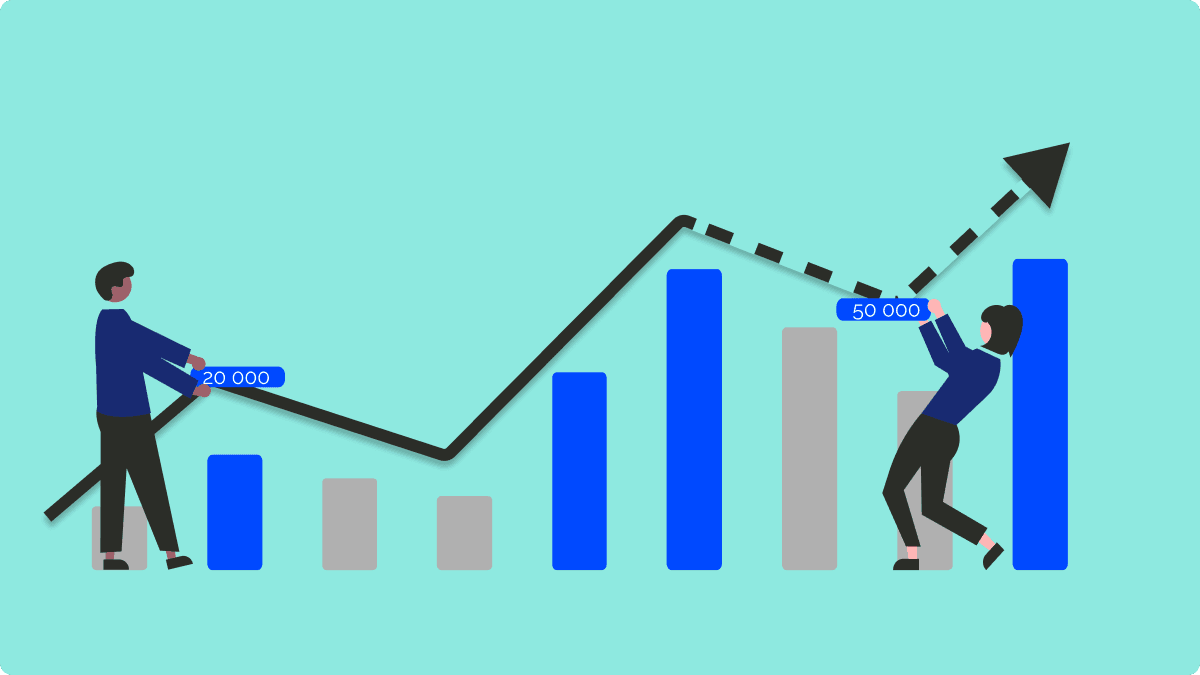

In [1]:
# used for numerical operations
import numpy as np
# for data manipulation
import pandas as pd
# for data vizulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
# for visualizing missing/null values in our data frame
import missingno as msno
# for manipulation of data with type datetime
from datetime import datetime
# used to remove warnings for better asthetics
import warnings
warnings.filterwarnings('ignore')
# to increase the number of visible columns in our data frame
from google.colab.data_table import DataTable
DataTable.max_columns = 30

#SKLEARN#
# preprocessing technique in scikit-learn that scales the features of a dataset to have zero mean and unit variance.
from sklearn.preprocessing import StandardScaler
# preprocessing technique in scikit-learn that converts categorical variables into numerical values using one-hot encoding.
from sklearn.preprocessing import OneHotEncoder
# function in scikit-learn that splits a dataset into training and testing sets for machine learning model evaluation.
from sklearn.model_selection import train_test_split
# method in scikit-learn for hyperparameter tuning that performs randomized search over specified parameter values for an estimator.
from sklearn.model_selection import RandomizedSearchCV
# method in scikit-learn for hyperparameter tuning that performs exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV
# function in scikit-learn that performs k-fold cross-validation for model evaluation, returning an array of scores for each fold.
from sklearn.model_selection import cross_val_score
# linear regression model in scikit-learn that predicts the target variable based on linear relationship between input features and target.
from sklearn.linear_model import LinearRegression
# it is a linear regression model in scikit-learn that performs L2 regularization to prevent overfitting.
from sklearn.linear_model import Ridge
# a linear regression model in scikit-learn that performs L1 regularization to prevent overfitting and feature selection.
from sklearn.linear_model import Lasso
#  module in scikit-learn that provides various evaluation metrics for model performance, such as accuracy, precision, recall, and F1-score.
from sklearn import metrics
# metric in scikit-learn that calculates the coefficient of determination (R2) to evaluate the goodness-of-fit of a regression model.
from sklearn.metrics import r2_score
# it is a metric in scikit-learn that calculates the mean squared error (MSE) between predicted and actual values to evaluate the performance of a regression model.
from sklearn.metrics import mean_squared_error


In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
sales = pd.read_csv('/content/drive/MyDrive/Advertising (1).csv', header= 0,encoding= 'unicode_escape')


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
# Dataset First Look
sales

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [26]:
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
# Dataset Rows & Columns count
np.shape(sales)

(200, 5)

In [10]:
# Dataset Info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [13]:
# Dropping duplicate values if any present in our dataframe meanwhile retaining the first value
sales = sales.drop_duplicates(keep='first')

In [14]:
# Dataset Duplicate Value Count
sales.duplicated().sum()

0

In [15]:
# Missing Values/Null Values Count
sales.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

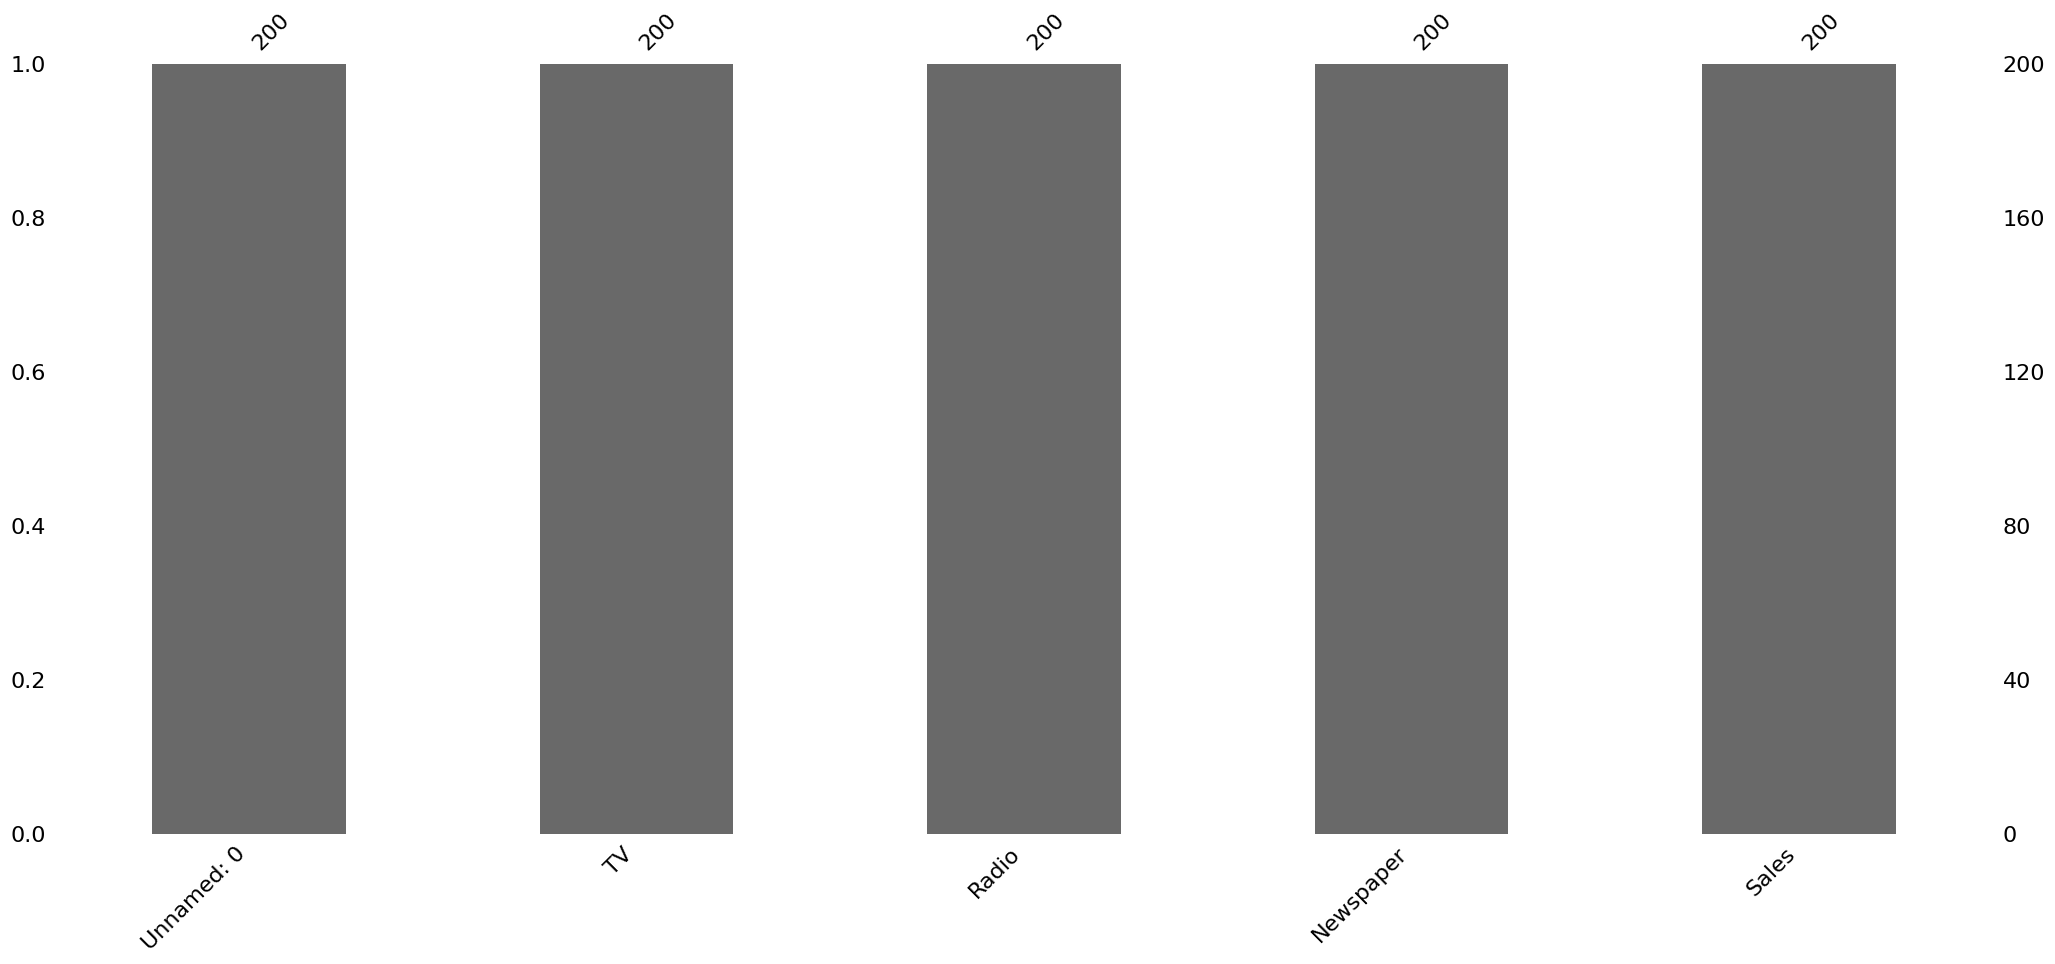

In [16]:
# Let's plot all the null values present in our dataframe using bargraph and missingno library
plt.figure(figsize=(10,8)) # used to provide a specific size to our graph
msno.bar(sales);

In [17]:
# Dataset Columns
sales.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [18]:
# Dataset Describe
sales.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [23]:
# Dropping 'Unnamed: 0' column as we dont need it anymore
sales.drop(columns=["Unnamed: 0"],inplace=True)

In [24]:
# Check Unique Values for each variable.
def unique_values(df):
    for col in df.columns:
        unique_count = df[col].nunique()
        a=print(f"COLUMN NAME ({col}): {unique_count} unique values")
    return a
unique_values(sales)

COLUMN NAME (TV): 190 unique values
COLUMN NAME (Radio): 167 unique values
COLUMN NAME (Newspaper): 172 unique values
COLUMN NAME (Sales): 121 unique values


In [25]:
# function for selecting all the numerical columns
def numerical_col(df):
  c = []
  for col in df.columns:
    if df[col].dtype =='int' or df[col].dtype =='float':
       c.append(col)
  return c
numerical_col(sales)

['TV', 'Radio', 'Newspaper', 'Sales']

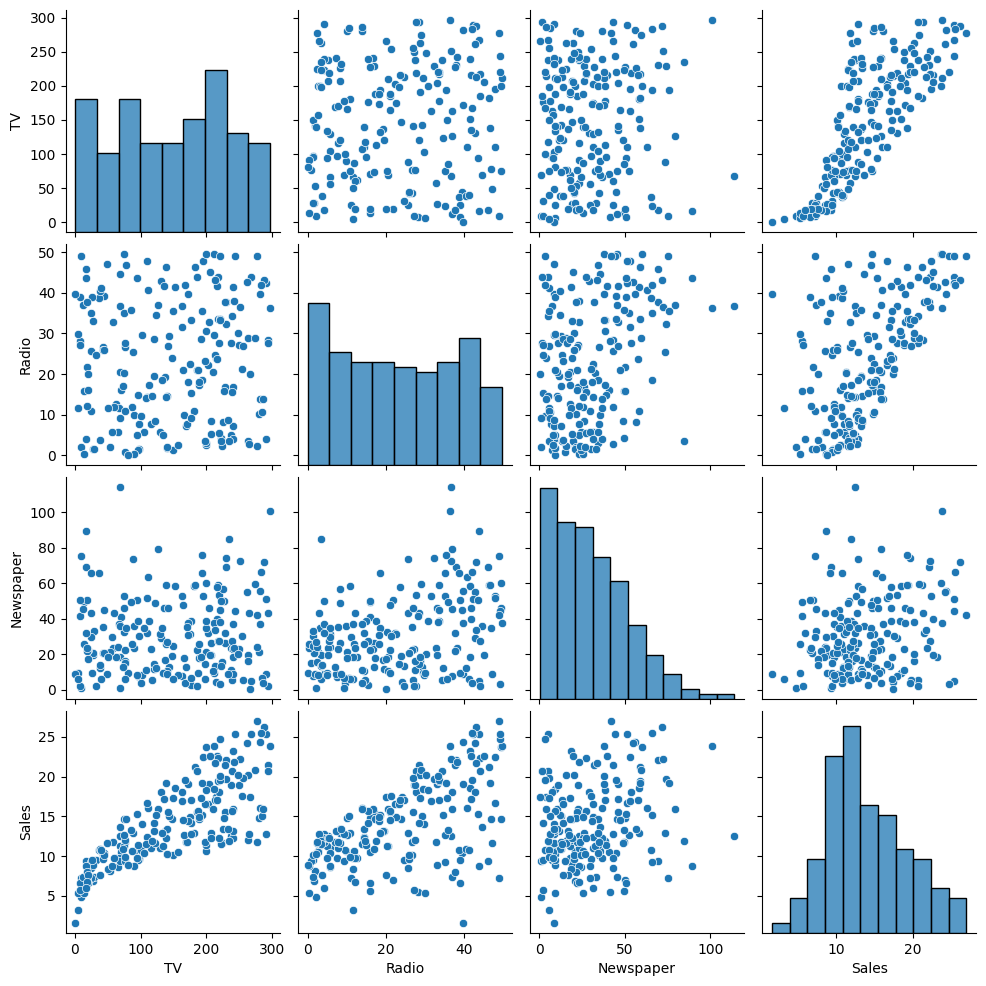

In [28]:
# Pairplot: Scatter plots and histograms for each variable
sns.pairplot(sales)
plt.show()


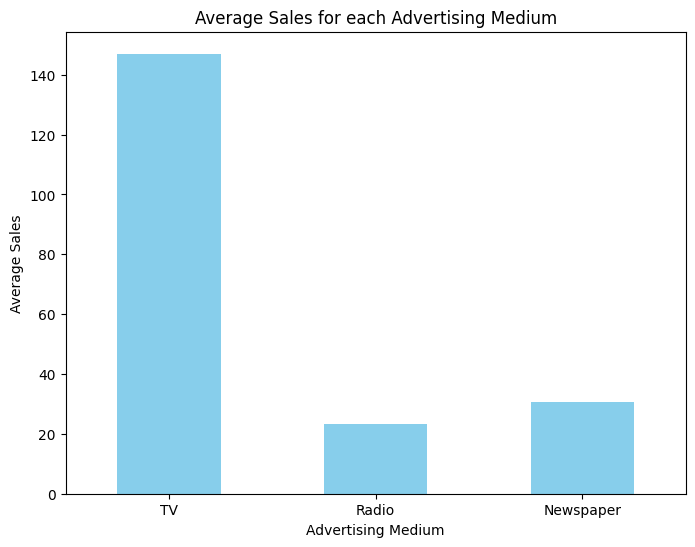

In [33]:
# Calculate the average sales for each advertising medium
avg_sales_by_media = sales[['TV', 'Radio', 'Newspaper']].mean()

# Plot the average sales for each medium in a single bar graph
plt.figure(figsize=(8, 6))
avg_sales_by_media.plot(kind='bar', color='skyblue')
plt.xlabel('Advertising Medium')
plt.ylabel('Average Sales')
plt.title('Average Sales for each Advertising Medium')
plt.xticks(rotation=0)
plt.show()

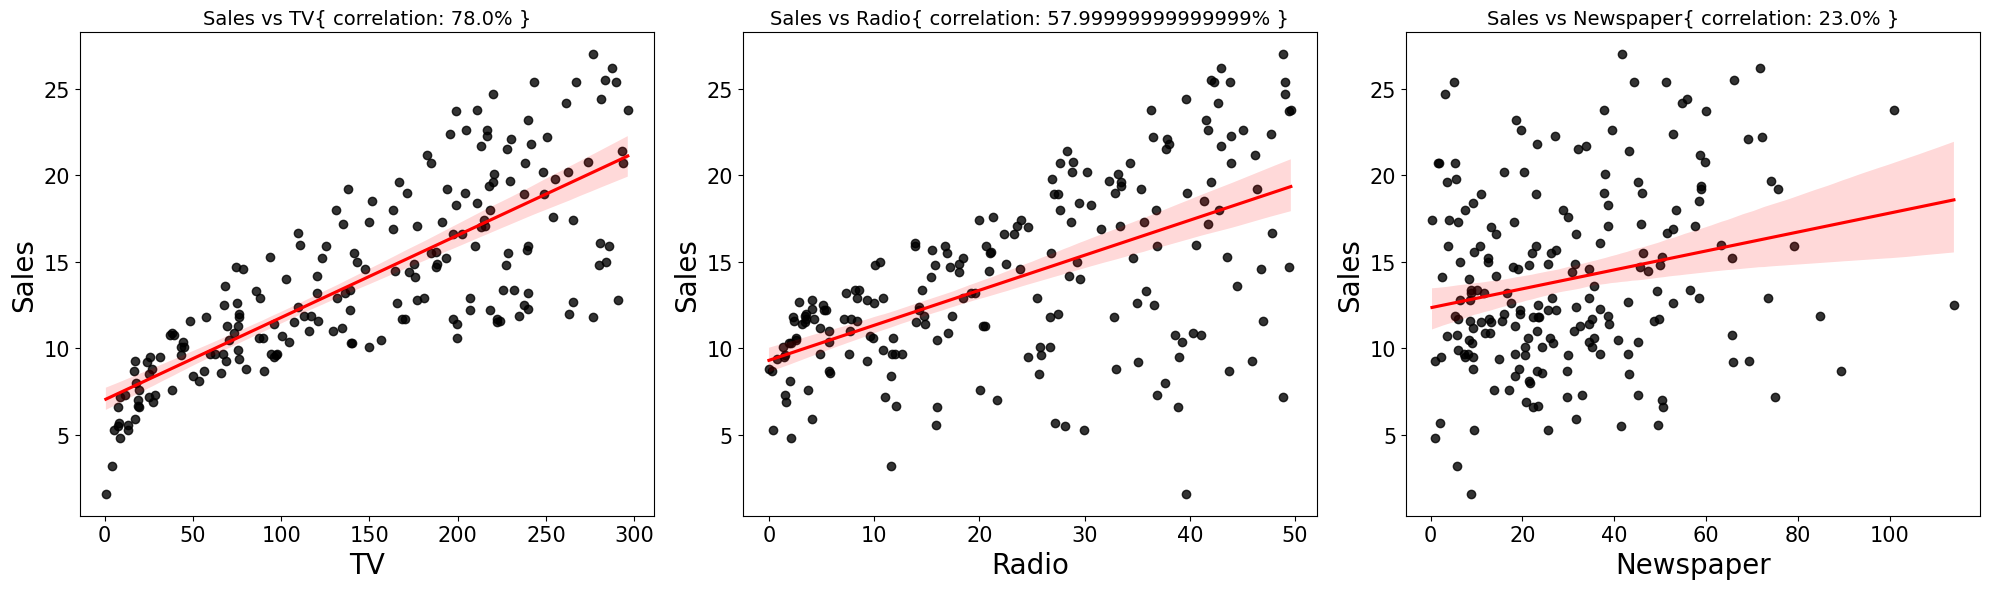

In [41]:
# plotting regression subplots for every numerical column with respect to our target variable "Sales" just to check the relationship between them
numeric_cols = sales[['TV', 'Radio', 'Newspaper','Sales']]
fig, axs = plt.subplots(1, 3, figsize=(20,6), facecolor="white")
axs = axs.ravel()
for i, col in enumerate(numeric_cols.columns[0:-1]):
    sns.regplot(x=col, y="Sales", data=numeric_cols, ax=axs[i], scatter_kws={"color": "black"}, line_kws={"color": "red"})
    axs[i].tick_params(axis='x', colors='black', labelsize=15)
    axs[i].tick_params(axis='y', colors='black', labelsize=15)
    axs[i].set_xlabel(col, color='black', fontsize=20)
    axs[i].set_ylabel("Sales", color='black', fontsize=20)
    independant = numeric_cols[col]
    target = numeric_cols['Sales']
    correlation = independant.corr(target)
    axs[i].set_title('Sales vs ' + col + '{ correlation: ' + str((round(correlation,2))*100) + '% }', color='black',fontsize=14);
plt.tight_layout()
plt.show()

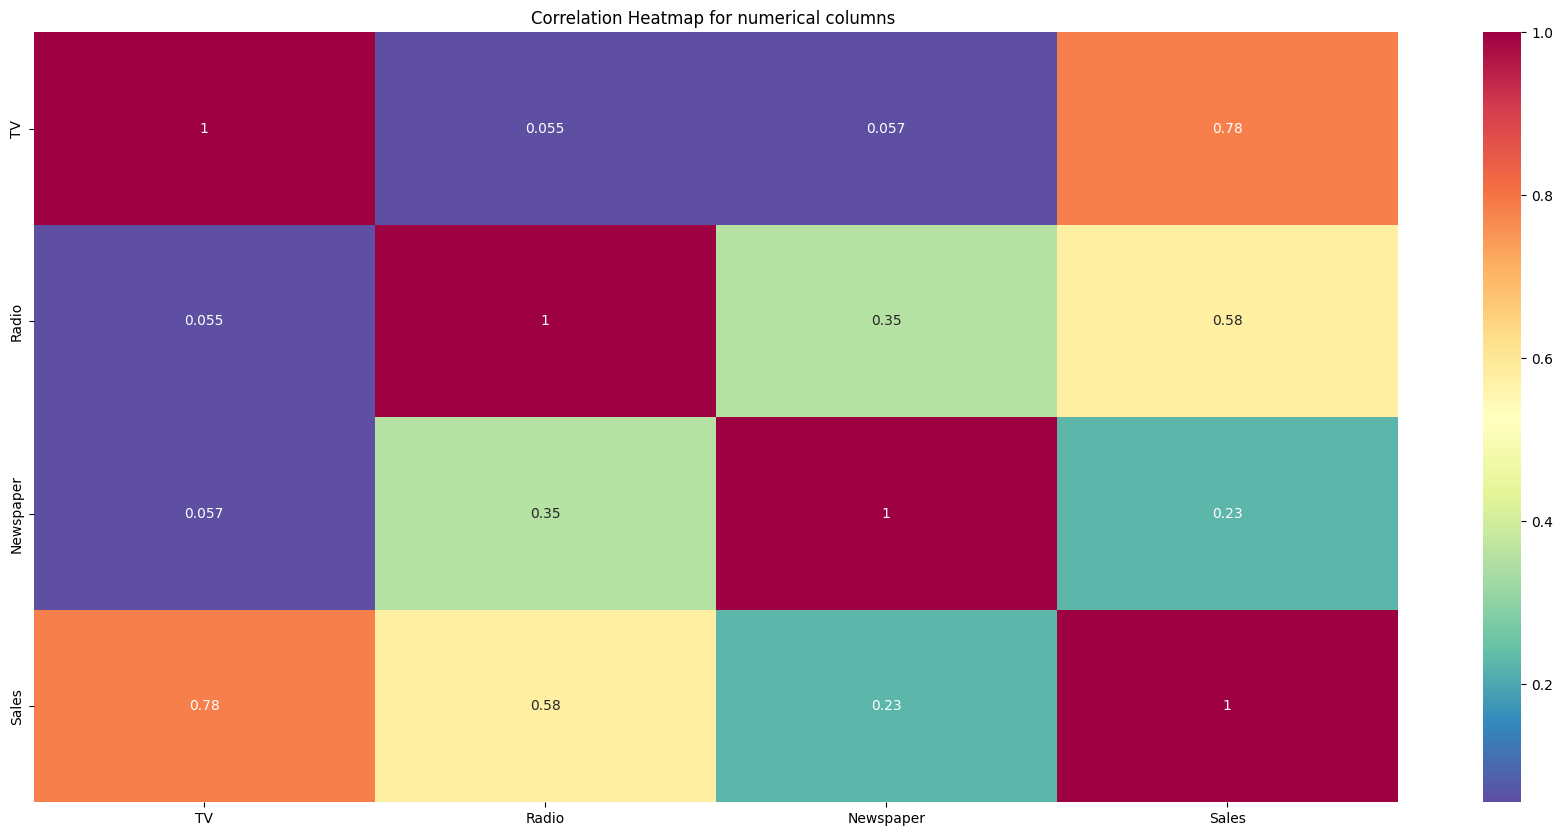

In [42]:
# plotting heatmap using seaborn to establish relations between features
plt.figure(figsize=(22,10))
# title
plt.title("Correlation Heatmap for numerical columns ")
sns.heatmap(sales.corr(),annot=True,cmap='Spectral_r');

In [51]:
def outlier_detection(df):
    num_columns = len(df.columns)
    num_rows = (num_columns + 3) // 4  # Calculate the number of rows
    num_cols = 4  # Set the number of columns to 4 for 4 plots in each row

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6))

    for i, column in enumerate(df.columns):
        row_idx = i // num_cols
        col_idx = i % num_cols

        if num_rows > 1:
            ax = axes[row_idx, col_idx]
        else:
            ax = axes[col_idx]

        ax.boxplot(df[column])  # Generate the box plot
        ax.set_title(f'Outliers for {column}')  # Set the title
        ax.set_xlabel(column)  # Set the x-axis label
        ax.set_ylabel('Value ----->')  # Set the y-axis label

    plt.tight_layout()
    plt.show()

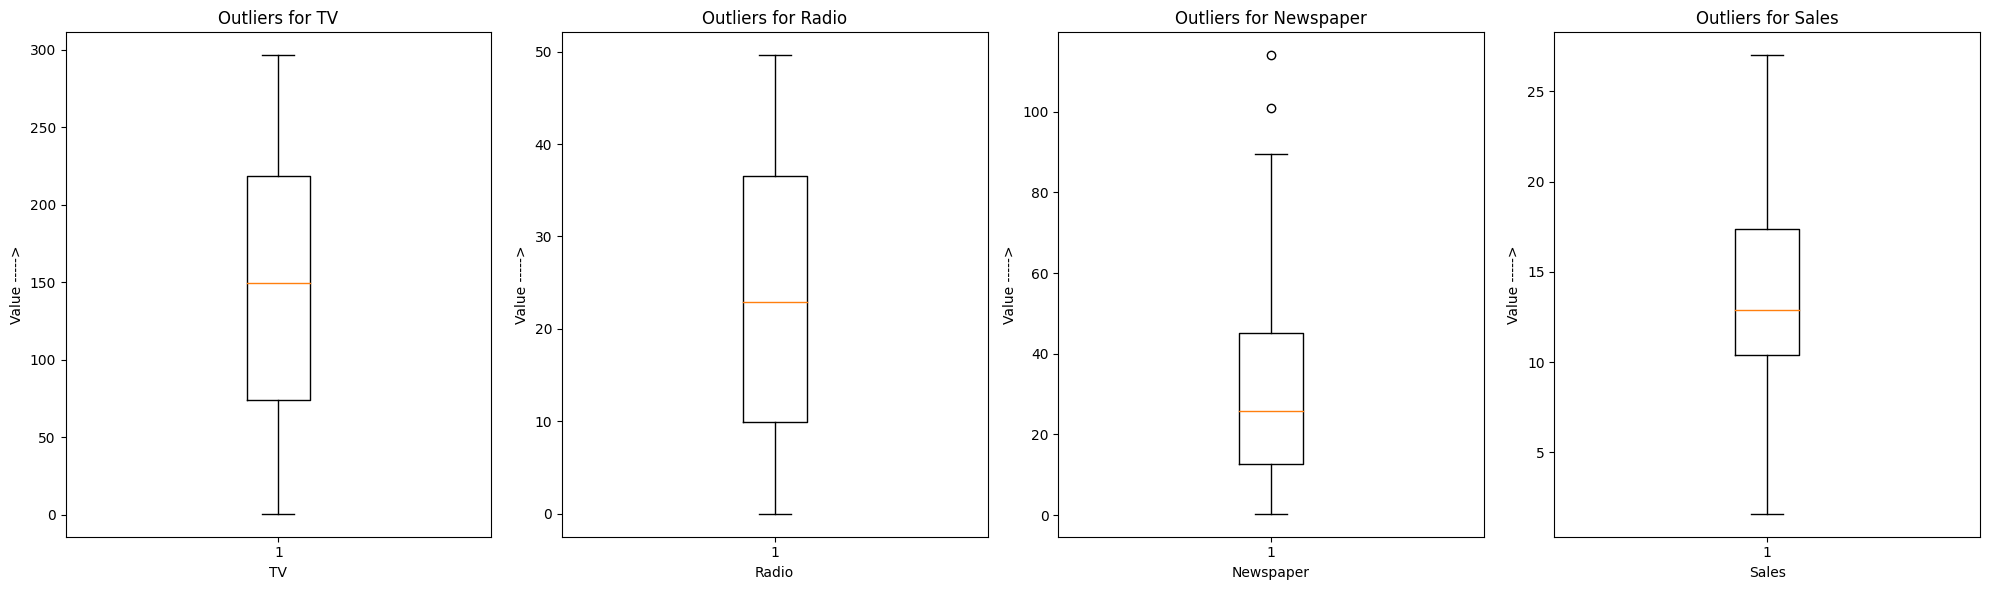

In [52]:
outlier_detection(sales)

# **Random Forest with GridSearchCV**

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
x = sales.drop('Sales', axis=1)
y = sales['Sales']

In [54]:

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf = RandomForestRegressor()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [55]:
# GridSearchCV with Random Forest Regressor
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [56]:
best_rf = grid_search.best_estimator_
# Predict on the test set
y_pred = best_rf.predict(x_test)

# Evaluation metrics

r2 = r2_score(y_test, y_pred)

from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error for test data : {mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error for test data : {mean_squared_error(y_test,y_pred)}')
print(f'Root Mean Squared Error for test data : {np.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'R_square for test data : {r2}')


Mean Absolute Error for test data : 0.6275749999999997
Mean Squared Error for test data : 0.5544361750000009
Root Mean Squared Error for test data : 0.7446047105679636
R_square for test data : 0.9824343140584237


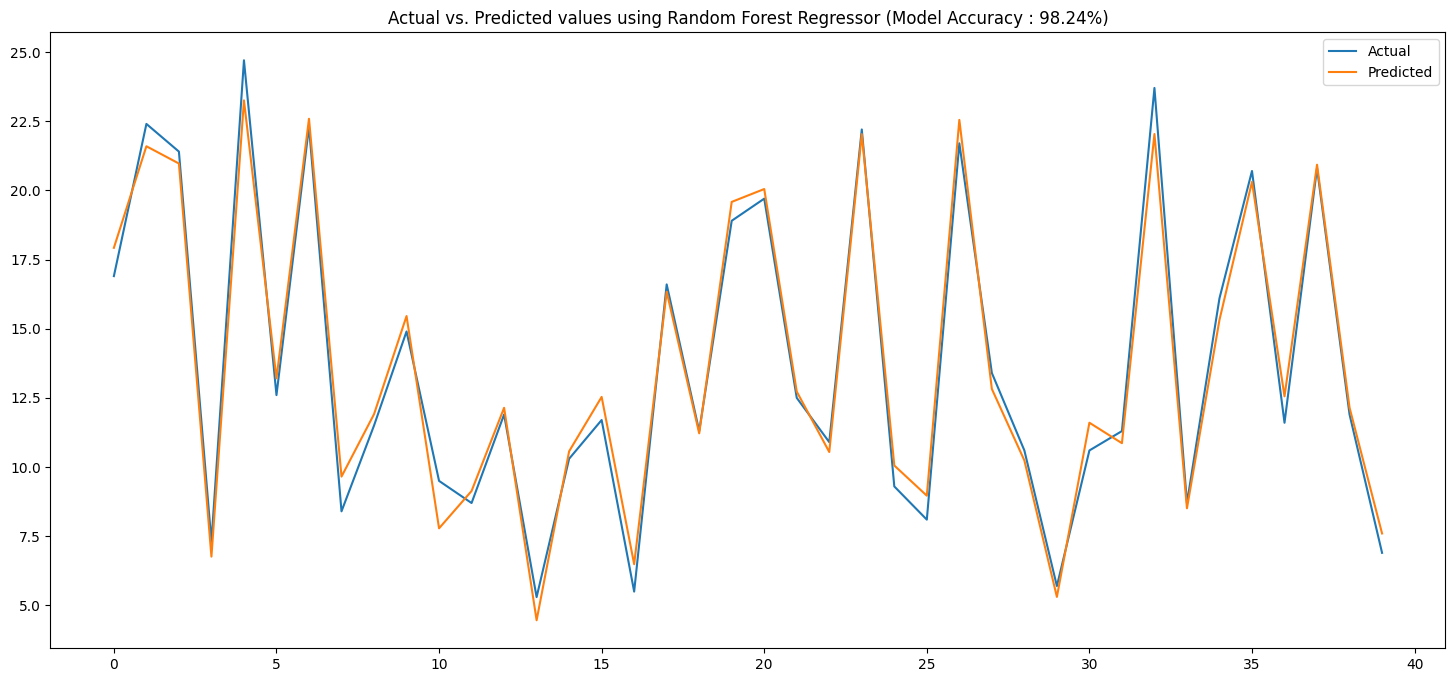

In [57]:
plt.figure(figsize = (18,8))
plt.plot(np.array(y_test[:200]), label='Actual')
plt.plot(np.array(y_pred[:200]), label='Predicted')
plt.title(f'Actual vs. Predicted values using Random Forest Regressor (Model Accuracy : {round(r2*100,2)}%)')
plt.legend()
plt.show()


In [80]:
# Writing a function for training a model and to also check its performance
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# function for model fitting and testing
def model(algorithm,x_train_,y_train_,x_test_,y_test_):
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)

    # Appending results to Lists
    r_2.append(R_2)
    CV.append(cross_val.mean())

    # Evaluation metrics



    print(algorithm,"\n")
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    print(f'Mean Absolute Error for test data : {mean_absolute_error(y_test_,predicts)}')
    print(f'Mean Squared Error for test data : {mean_squared_error(y_test_,predicts)}')
    print(f'Root Mean Squared Error for test data : {np.sqrt(mean_squared_error(y_test,predicts))}')


    # Plot for actual vs prediction
    test_index=y_test_.reset_index()["Sales"]
    ax=test_index.plot(label="Actual",figsize=(12,6),linewidth=2,color="b")
    ax=prediction[0].plot(label = "Prediction",figsize=(12,6),linewidth=2,color="y")
    plt.legend(loc='upper right')
    plt.title("Actual VS Prediction")
    plt.ylabel("values")
    plt.show()

#**XGBoost with GridSearchCV**

In [81]:
from xgboost import XGBRegressor
# XGBoost Regressor
xgb = XGBRegressor()

In [82]:
param_grid_xg = {
    'n_estimators': [50, 100, 150],   # Number of boosting rounds
    'learning_rate': [0.1, 0.01, 0.001],  # Step size shrinkage to prevent overfitting
    'max_depth': [3, 5, 7]  # Maximum depth of a tree
}

# Create the GridSearchCV object
grid_search_xg = GridSearchCV(estimator=xgb, param_grid=param_grid_xg, scoring='neg_mean_squared_error', cv=5)
# Fit the model to find the best hyperparameters
grid_search_xg.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [83]:
# Get the best hyperparameters and the best model
best_params_xg = grid_search_xg.best_params_
best_model_xg = grid_search_xg.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) 

r_2 score : 0.9819429250405167 

CV scores: [0.9769875  0.95720268 0.98406347 0.98141033 0.96153247] 

CV scores mean: 0.972239291310655
Mean Absolute Error for test data : 0.6247374916076659
Mean Squared Error for test data : 0.5699461783344281
Root Mean Squar

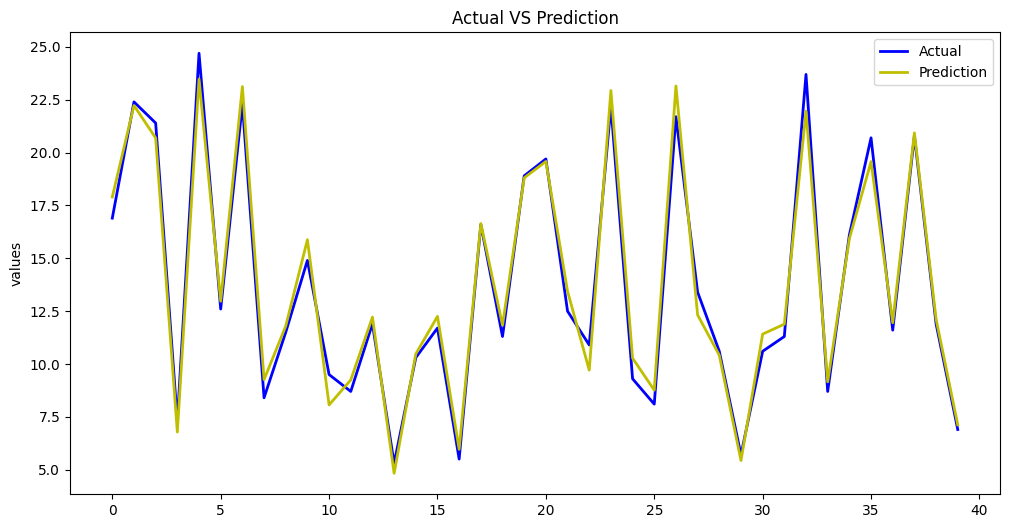

In [84]:

#applying the above function
model(best_model_xg,x_train,y_train,x_test,y_test)

# **Decision Tree with GridSearchCV**

In [68]:
from sklearn.tree import DecisionTreeRegressor
# Decision Tree Regressor
dt = DecisionTreeRegressor()

In [77]:
# Define the hyperparameter grid to search
param_grid_dt = {
    'criterion': ['mse', 'friedman_mse', 'mae'],  # Function to measure the quality of a split
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
# Create the GridSearchCV object
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, scoring='neg_mean_squared_error', cv=5)
# Fit the model to find the best hyperparameters
grid_search_dt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [78]:
# Get the best hyperparameters and the best model
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_leaf=2, min_samples_split=5) 

r_2 score : 0.9198616879613083 

CV scores: [0.95909209 0.92405556 0.90747907 0.94708697 0.94210821] 

CV scores mean: 0.9359643799032058
Mean Absolute Error for test data : 1.114791666666667
Mean Squared Error for test data : 2.5294531250000003
Root Mean Squared Error for test data : 1.5904254540845353


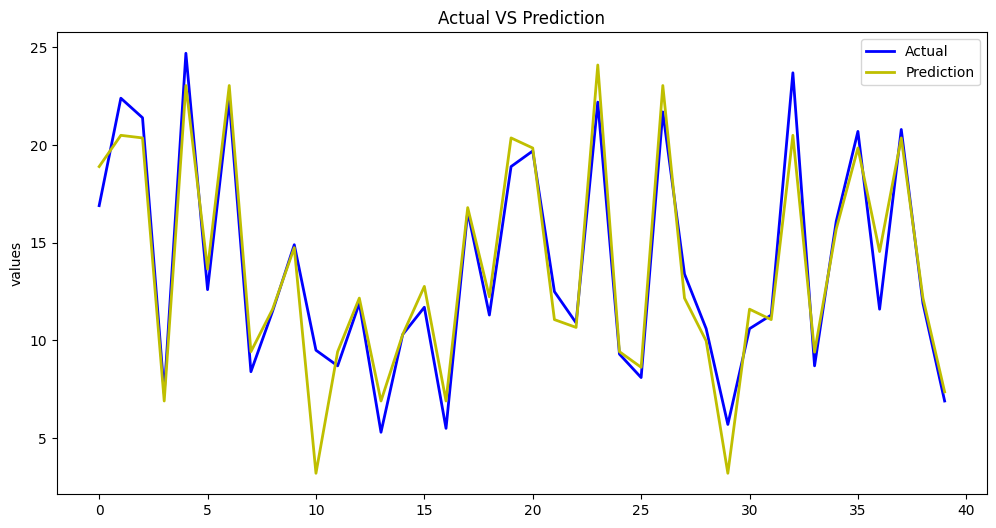

In [85]:
model(best_model_dt,x_train,y_train,x_test,y_test)